In [11]:
# read ./unlearning_output/all

with open('./unlearning_output/all_layers_ablation_results_gemma2-2b-it.txt', 'r') as f:
    lines = f.read().split('\n')

In [12]:
lines = [l for l in lines if l[:4] != '100%']
lines

['10 features, 1x',
 "{'wmdp-bio': 0.604084849357605, 'high_school_us_history': 0.7352941632270813, 'high_school_geography': 0.752525269985199, 'college_computer_science': 0.3999999761581421, 'human_aging': 0.6322870254516602, 'college_biology': 0.6597222089767456}",
 '10 features, 5x',
 "{'wmdp-bio': 0.5027494430541992, 'high_school_us_history': 0.7107843160629272, 'high_school_geography': 0.7424242496490479, 'college_computer_science': 0.4099999964237213, 'human_aging': 0.6098654866218567, 'college_biology': 0.5833333134651184}",
 '10 features, 10x',
 "{'wmdp-bio': 0.42576590180397034, 'high_school_us_history': 0.6813725829124451, 'high_school_geography': 0.7424242496490479, 'college_computer_science': 0.3799999952316284, 'human_aging': 0.5874439477920532, 'college_biology': 0.506944477558136}",
 '10 features, 20x',
 "{'wmdp-bio': 0.293794184923172, 'high_school_us_history': 0.6617647409439087, 'high_school_geography': 0.6565656661987305, 'college_computer_science': 0.359999984502792

In [14]:
import ast

data_list = []

# Parse each match
for i in range(0, len(lines) - 2, 2):
    intervention = lines[i]
    content = lines[i + 1]
    
    scores_dict = ast.literal_eval(content)
    scores_dict['intervention'] = intervention
    data_list.append(scores_dict)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
df = pd.DataFrame(data_list)

In [22]:
df['n_features'] = df['intervention'].apply(lambda x: int(x.split(' ')[0]))
df['multiplier'] = df['intervention'].apply(lambda x: int(x.split(' ')[-1][:-1]))
df

,wmdp-bio,high_school_us_history,high_school_geography,college_computer_science,human_aging,college_biology,intervention,n_features,multiplier
0,0.604085,0.735294,0.752525,0.40,0.632287,0.659722,"10 features, 1x",10,1
1,0.502749,0.710784,0.742424,0.41,0.609865,0.583333,"10 features, 5x",10,5
2,0.425766,0.681373,0.742424,0.38,0.587444,0.506944,"10 features, 10x",10,10
3,0.293794,0.661765,0.656566,0.36,0.502242,0.402778,"10 features, 20x",10,20
4,0.250589,0.254902,0.287879,0.30,0.300448,0.236111,"10 features, 50x",10,50
5,0.266300,0.254902,0.171717,0.29,0.295964,0.236111,"10 features, 100x",10,100
6,0.594658,0.715686,0.752525,0.41,0.623318,0.666667,"20 features, 1x",20,1
7,0.469756,0.705882,0.742424,0.39,0.618834,0.597222,"20 features, 5x",20,5
8,0.381775,0.671569,0.717172,0.35,0.551570,0.479167,"20 features, 10x",20,10
9,0.263158,0.500000,0.500000,0.28,0.443946,0.298611,"20 features, 20x",20,20


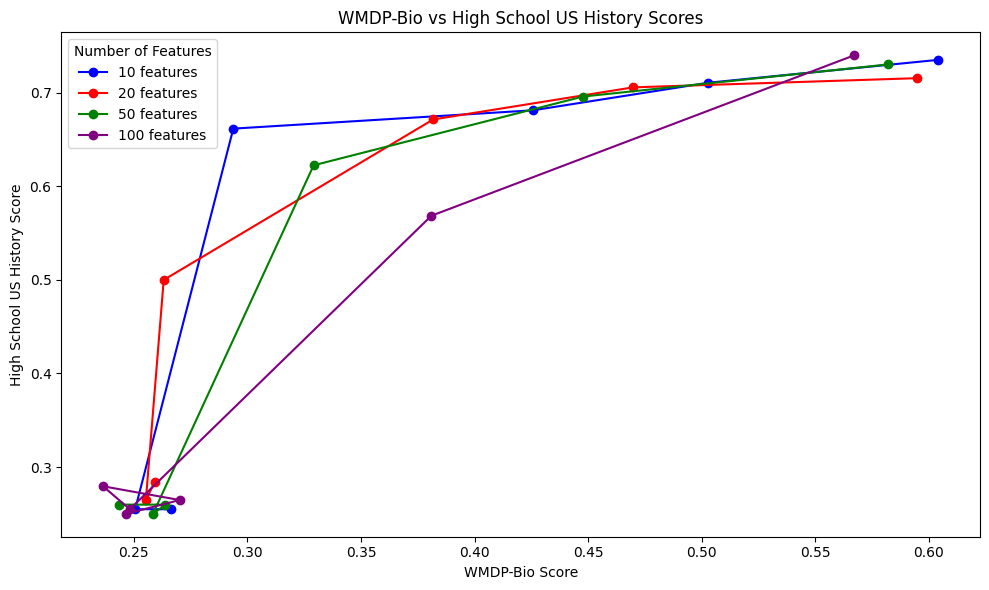

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is already in a DataFrame called 'df'
# If not, you would need to create it from your data source

# Create the plot
plt.figure(figsize=(10, 6))

# Define colors for n_features
colors = {10: 'blue', 20: 'red', 50: 'green', 100: 'purple'}

# Plot lines for each n_features group
for n_features in df['n_features'].unique():
    group = df[df['n_features'] == n_features].sort_values('multiplier')
    plt.plot(group['wmdp-bio'], group['high_school_us_history'], 
             color=colors[n_features], 
             label=f"{n_features} features",
             marker='o')  # Use circle marker for all points

# Add labels and title
plt.xlabel('WMDP-Bio Score')
plt.ylabel('High School US History Score')
plt.title('WMDP-Bio vs High School US History Scores')

# Create legend
plt.legend(title="Number of Features")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

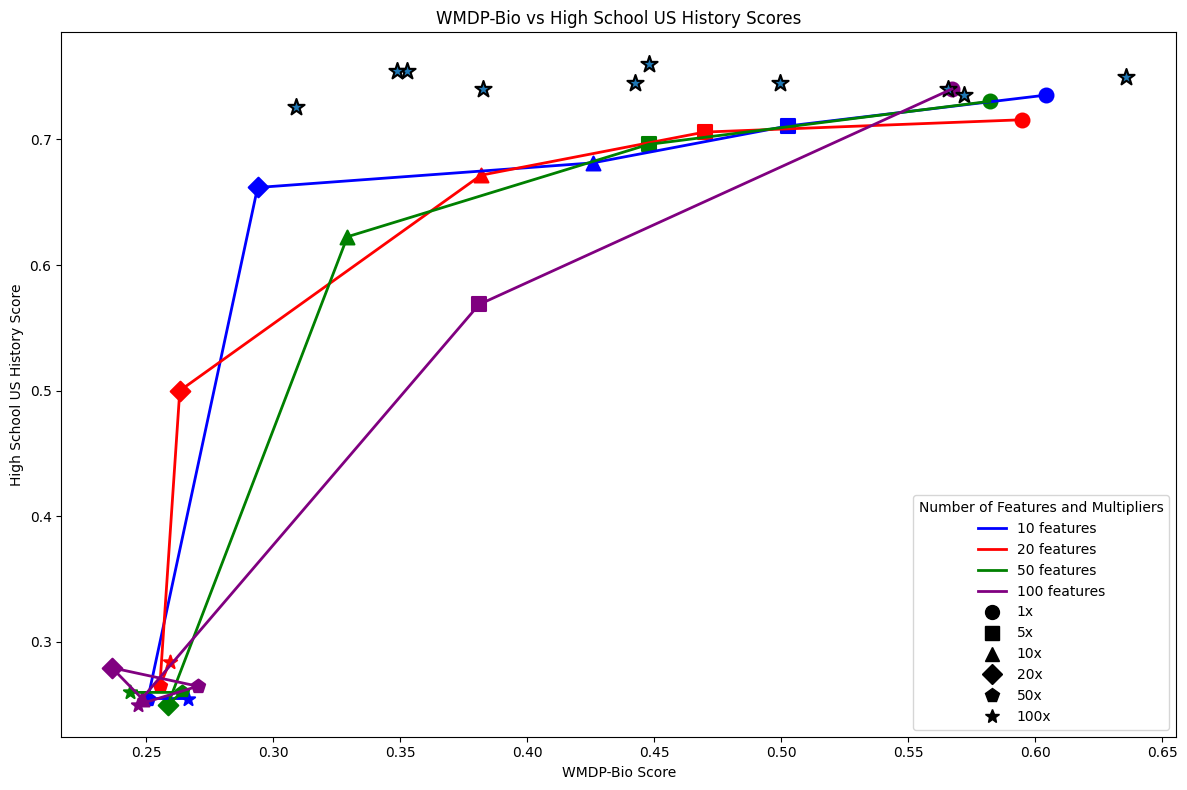

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


# Create the plot
plt.figure(figsize=(12, 8))

# Define colors for n_features and markers for multipliers
colors = {10: 'blue', 20: 'red', 50: 'green', 100: 'purple'}
markers = {1: 'o', 5: 's', 10: '^', 20: 'D', 50: 'p', 100: '*'}
# Plot lines and markers for each n_features group
legend_elements = []
for n_features in df['n_features'].unique():
    group = df[df['n_features'] == n_features].sort_values('multiplier')
    
    # Plot the line
    line, = plt.plot(group['wmdp-bio'], group['high_school_us_history'], 
             color=colors[n_features], 
             label=f"{n_features} features",
             linestyle='-',
             linewidth=2)
    legend_elements.append(line)
    
    # Plot individual points with different markers
    for _, row in group.iterrows():
        plt.scatter(row['wmdp-bio'], row['high_school_us_history'], 
                    color=colors[n_features], 
                    marker=markers[row['multiplier']], 
                    s=100,  # Marker size
                    linewidth=1.5)

# Add labels and title
plt.xlabel('WMDP-Bio Score')
plt.ylabel('High School US History Score')
plt.title('WMDP-Bio vs High School US History Scores')

# Create legend for multipliers
multiplier_legend = [plt.Line2D([0], [0], color='black', marker=marker, linestyle='None',
                                markersize=10, label=f'{mult}x')
                     for mult, marker in markers.items()]

# Combine feature and multiplier legends
legend_elements.extend(multiplier_legend)



plt.scatter(df_rmu['wmdp-bio'], df_rmu['high_school_us_history'], 
            marker='*',  # Use star marker for new points
            s=150, edgecolors='black', linewidth=1.5)
    
# Add the combined legend
plt.legend(handles=legend_elements,
           title="Number of Features and Multipliers",
           loc='lower right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [46]:
import pickle
import os

all_results = []
for layer in [3, 7, 11]:
    for s in [100, 200, 400]:
        for a in [100, 300, 500]:
            model_name = f'gemma_2_2b_it_s{s}_a{a}_layer{layer}'   
            
            if os.path.exists(f'../data/unlearn_results/rmu/all/{model_name}.pkl'):
                with open(f'../data/unlearn_results/rmu/all/{model_name}.pkl', 'rb') as f:
                    results = pickle.load(f)
                    row = {d: results[d]['mean_correct'] for d in results}
                    row['rmu'] = model_name
                    all_results.append(row)

In [47]:
df_rmu = pd.DataFrame(all_results)
df_rmu

,wmdp-bio,high_school_us_history,high_school_geography,college_computer_science,human_aging,college_biology,rmu
0,0.447761,0.759804,0.762626,0.46,0.650224,0.729167,gemma_2_2b_it_s100_a100_layer3
1,0.571877,0.735294,0.767677,0.46,0.636771,0.722222,gemma_2_2b_it_s100_a300_layer3
2,0.635507,0.750000,0.762626,0.46,0.632287,0.715278,gemma_2_2b_it_s100_a500_layer3
3,0.352710,0.754902,0.782828,0.45,0.645740,0.701389,gemma_2_2b_it_s200_a100_layer3
4,0.442262,0.745098,0.772727,0.45,0.641256,0.729167,gemma_2_2b_it_s200_a300_layer3
5,0.499607,0.745098,0.762626,0.44,0.636771,0.715278,gemma_2_2b_it_s200_a500_layer3
6,0.308720,0.725490,0.797980,0.46,0.632287,0.666667,gemma_2_2b_it_s400_a100_layer3
7,0.348782,0.754902,0.782828,0.45,0.623318,0.701389,gemma_2_2b_it_s400_a300_layer3
8,0.382561,0.740196,0.772727,0.45,0.632287,0.722222,gemma_2_2b_it_s400_a500_layer3
9,0.565593,0.740196,0.767677,0.45,0.618834,0.708333,gemma_2_2b_it_s100_a100_layer7


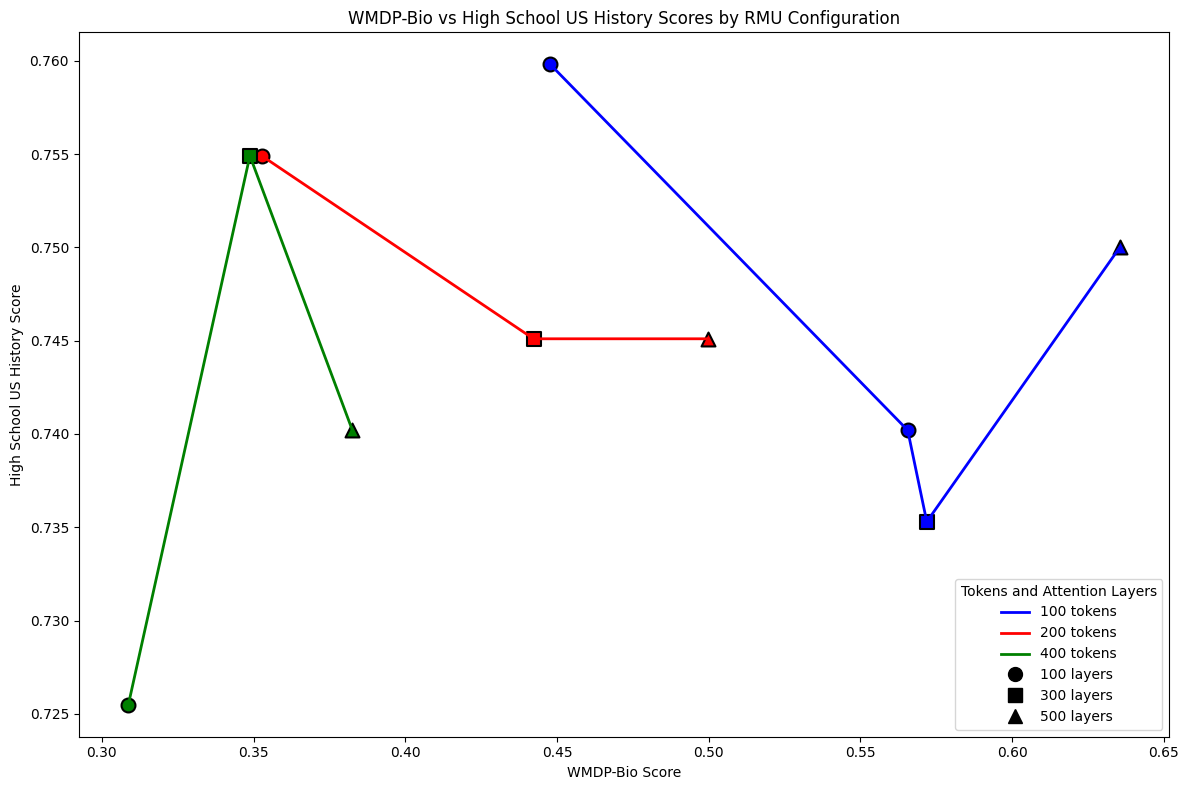

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Assuming the DataFrame is named df_rmu as in your image
# If not, replace df_rmu with the actual name of your DataFrame

# Function to extract tokens and layers from rmu string
def extract_tokens_layers(rmu_string):
    match = re.search(r's(\d+)_a(\d+)', rmu_string)
    if match:
        return int(match.group(1)), int(match.group(2))
    return None, None

# Apply the function to create new columns
df_rmu['tokens'] = df_rmu['rmu'].apply(lambda x: extract_tokens_layers(x)[0])
df_rmu['layers'] = df_rmu['rmu'].apply(lambda x: extract_tokens_layers(x)[1])

# Create the plot
plt.figure(figsize=(12, 8))

# Define colors for tokens and markers for layers
colors = {100: 'blue', 200: 'red', 400: 'green'}
markers = {100: 'o', 300: 's', 500: '^'}

# Plot lines and markers
for tokens in sorted(df_rmu['tokens'].unique()):
    group = df_rmu[df_rmu['tokens'] == tokens].sort_values('layers')
    
    # Plot the line
    line, = plt.plot(group['wmdp-bio'], group['high_school_us_history'], 
             color=colors.get(tokens, 'gray'),  # Use gray for any unexpected token values
             label=f"{tokens} tokens",
             linestyle='-',
             linewidth=2)
    
    # Plot individual points with different markers
    for _, row in group.iterrows():
        plt.scatter(row['wmdp-bio'], row['high_school_us_history'], 
                    color=colors.get(tokens, 'gray'), 
                    marker=markers.get(row['layers'], 'x'),  # Use 'x' for any unexpected layer values
                    s=100,  # Marker size
                    edgecolors='black',
                    linewidth=1.5)

# Add labels and title
plt.xlabel('WMDP-Bio Score')
plt.ylabel('High School US History Score')
plt.title('WMDP-Bio vs High School US History Scores by RMU Configuration')

# Create legend for tokens (lines)
token_legend = [plt.Line2D([0], [0], color=color, label=f'{tokens} tokens', linewidth=2)
                for tokens, color in colors.items()]

# Create legend for layers (markers)
layer_legend = [plt.Line2D([0], [0], color='black', marker=marker, linestyle='None',
                           markersize=10, label=f'{layers} layers')
                for layers, marker in markers.items()]

# Combine legends
plt.legend(handles=token_legend + layer_legend,
           title="Tokens and Attention Layers",
           loc='lower right')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [35]:
def plot_comparison(side_effect_column):

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Define colors for n_features and markers for multipliers
    colors = {10: 'blue', 20: 'red', 50: 'green', 100: 'purple'}
    markers = {1: 'o', 5: 's', 10: '^', 20: 'D', 50: 'p', 100: '*'}
    # Plot lines and markers for each n_features group
    legend_elements = []
    for n_features in df['n_features'].unique():
        group = df[df['n_features'] == n_features].sort_values('multiplier')
        
        # Plot the line
        line, = plt.plot(group['wmdp-bio'], group[side_effect_column], 
                color=colors[n_features], 
                label=f"{n_features} features",
                linestyle='-',
                linewidth=2)
        legend_elements.append(line)
        
        # Plot individual points with different markers
        for _, row in group.iterrows():
            plt.scatter(row['wmdp-bio'], row[side_effect_column], 
                        color=colors[n_features], 
                        marker=markers[row['multiplier']], 
                        s=100,  # Marker size
                        linewidth=1.5)

    # Add labels and title
    plt.xlabel('WMDP-Bio Score')
    plt.ylabel(side_effect_column)
    plt.title(f'WMDP-Bio vs {side_effect_column}')

    # Create legend for multipliers
    multiplier_legend = [plt.Line2D([0], [0], color='black', marker=marker, linestyle='None',
                                    markersize=10, label=f'{mult}x')
                        for mult, marker in markers.items()]

    # Combine feature and multiplier legends
    legend_elements.extend(multiplier_legend)

    # Add the combined legend
    plt.legend(handles=legend_elements,
            title="Number of Features and Multipliers",
            loc='lower right')

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

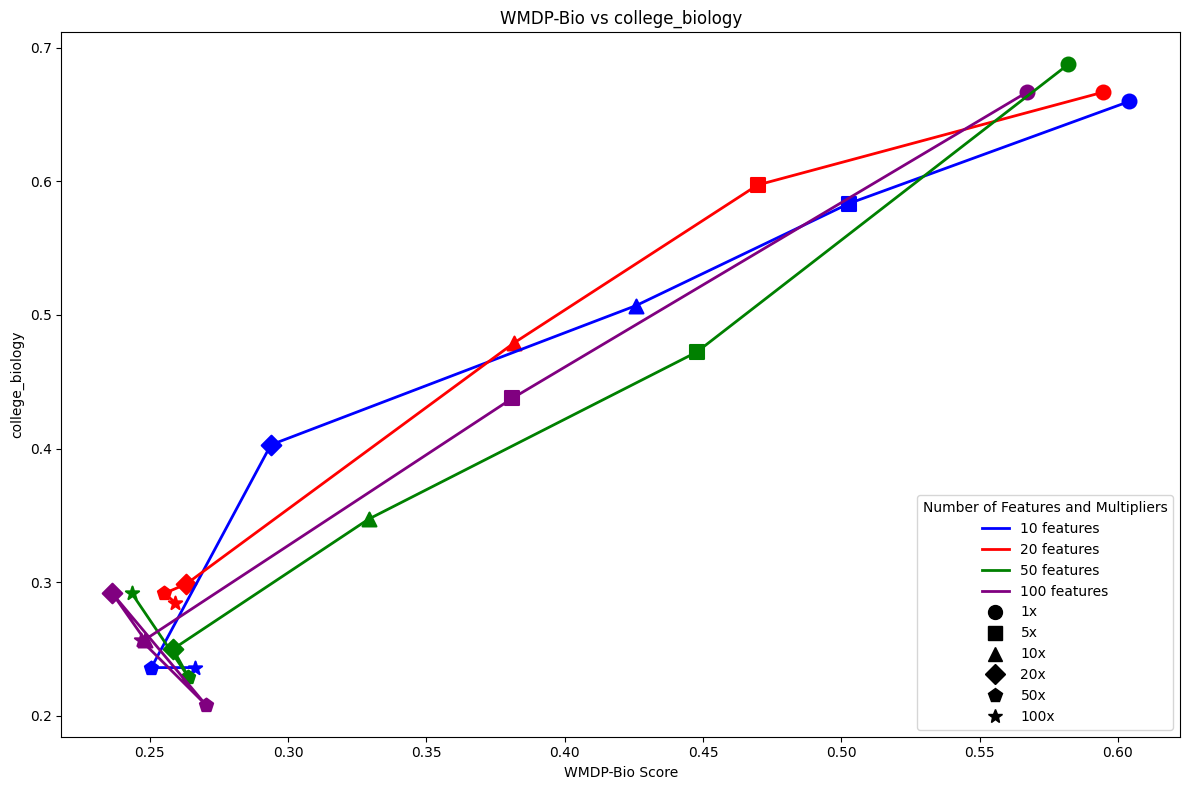

In [37]:
plot_comparison('college_biology')

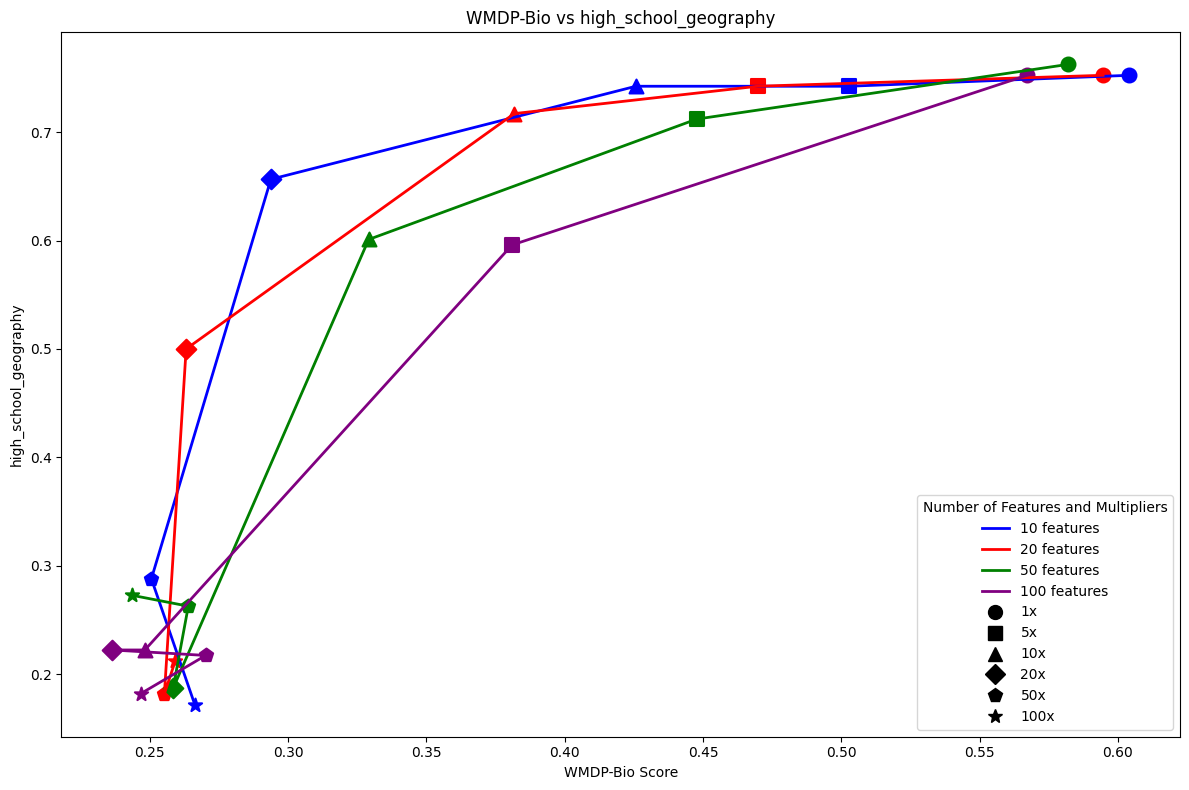

In [38]:
plot_comparison('high_school_geography')